In [109]:
import glom
import json
import pandas as pd
import matplotlib.pyplot as plt

from typing import Any, Callable, Dict, Iterable, List, OrderedDict, Tuple

In [24]:
def parse_jsonline_file(infile: str) -> List[Dict]:
    info = []
    with open(infile) as IN:
        for n, line in enumerate(IN):
            temp = line.strip()
            if not temp:
                continue
            load = glom.glom(temp, lambda x: json.loads(x))
            info.append(load)
    return info

In [25]:
log_file = "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json"

info = parse_jsonline_file(log_file)
df1 = pd.DataFrame.from_records(info)

df_train = df1[df1["status"] == "train"]
df_valid = df1[df1["status"] == "valid"]
   

In [26]:
df1

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy
0,train,0,0,0.818780,1.842990e-01,3.112373e-01,2.107951e-01,0.594523,0.874412
1,train,0,50,0.638831,2.035217e-01,3.139446e-01,2.514410e-01,0.558574,0.896727
2,train,0,100,0.525898,2.954357e-01,4.039511e-01,3.708908e-01,0.589172,0.930972
3,train,0,150,0.448034,3.498710e-01,4.513919e-01,4.398872e-01,0.596756,0.948383
4,train,0,200,0.394359,3.981238e-01,4.947663e-01,4.938090e-01,0.614252,0.957650
...,...,...,...,...,...,...,...,...,...
147,train,14,350,0.001757,8.987309e-01,9.399765e-01,9.806030e-01,0.911398,0.998965
148,valid,14,0,0.004868,6.369427e-11,6.369427e-11,6.369427e-11,1.000000,0.998503
149,valid,14,50,0.006394,7.181246e-01,7.537221e-01,7.604931e-01,0.916980,0.997365
150,train,15,0,0.003180,9.815411e-01,9.906846e-01,9.995599e-01,0.981965,0.998289


In [9]:
len(df_valid)

30

In [27]:
def myfunction(epoch, step):
#     g_s = epoch * steps_per_epoch + step
    g_s = epoch + step
    return int(g_s)

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\980538229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["total_step"] = df_train["step"]
C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\980538229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["total_step"] = df_train.apply(lambda x: myfunction(x["epoch"]*396,  x['step']), axis=1)


<Axes: xlabel='total_step'>

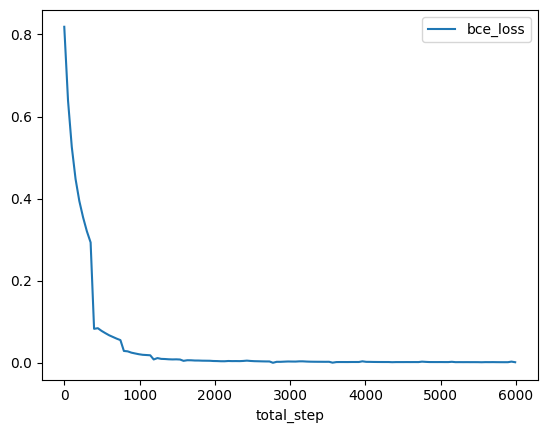

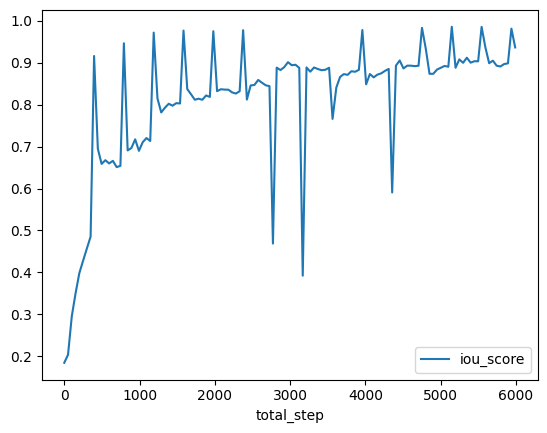

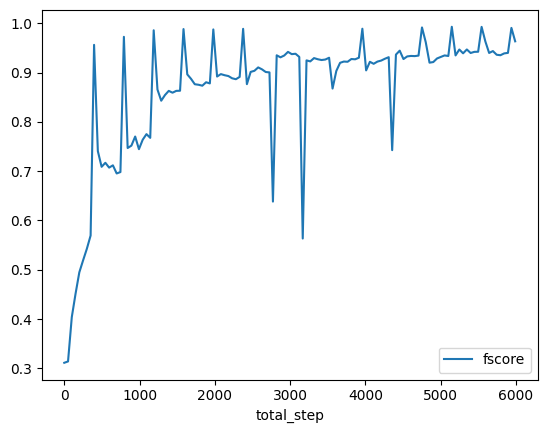

In [28]:
train_loss = df_train[["bce_loss", "step"]][:10]
tmp = df_train[["bce_loss","epoch","step"]]
# tmp = tmp.insert(2, "total_step", value=[0]*len(tmp))
df_train["total_step"] = df_train["step"]

epoch_step = 350
df_train["total_step"] = df_train.apply(lambda x: myfunction(x["epoch"]*396,  x['step']), axis=1)
df_train.plot(kind="line", x="total_step", y="bce_loss")
df_train.plot(kind="line", x="total_step", y="iou_score")
df_train.plot(kind="line", x="total_step", y="fscore")
# tmp

In [29]:
def plot_cumulative_returns(dataframe: pd.DataFrame):   
#     line_plot = Line(init_opts=opts.InitOpts(width="1400px", height="800px"))
#     line_plot.add_xaxis(xaxis_data=dataframe.index.strftime("%Y-%m-%d").values.tolist())
    for col_name in ["bce_loss", "fscore"]: # 循环绘制dataframe的曲线
        dataframe.plot.line(x="total_step")

In [48]:
log_file1 = "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315.json"
info1 = parse_jsonline_file(log_file1)
df2 = pd.DataFrame.from_records(info1)

df_train1 = df2[df2["status"] == "train"]
df_train1 = df_train1[df_train1["step"] % 50 == 0]
df_train1["total_step"] = df_train1["step"]
df_train1["total_step"] = df_train1.apply(lambda x: myfunction(x["epoch"]*396,  x['step']), axis=1)
# df_train1["total_step"]
df_train1

# plot_cumulative_returns(df_train)

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,train,0,0,0.612954,0.108167,0.195218,0.332548,0.138163,0.781480,0
5,train,0,50,0.369715,0.595695,0.712048,0.730084,0.713568,0.930363,50
10,train,0,100,0.280676,0.742258,0.825042,0.838363,0.825627,0.958317,100
15,train,0,150,0.235285,0.792608,0.859975,0.871500,0.867941,0.968514,150
20,train,0,200,0.204130,0.822852,0.881346,0.892589,0.890047,0.974256,200
...,...,...,...,...,...,...,...,...,...,...
2939,train,28,150,0.001314,0.994081,0.996997,0.997667,0.996350,0.999439,11238
2944,train,28,200,0.001313,0.994389,0.997160,0.997875,0.996464,0.999436,11288
2949,train,28,250,0.001304,0.994477,0.997209,0.997973,0.996461,0.999440,11338
2954,train,28,300,0.001303,0.994511,0.997230,0.998002,0.996471,0.999441,11388


In [50]:
# df_train11 = df_train1[df_train1["step"] % 50 == 0]
# df_train11

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\2975798065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine["fs_0"] = df_train1.reset_index()["fscore"][:len(df_train)]


<Axes: xlabel='total_step'>

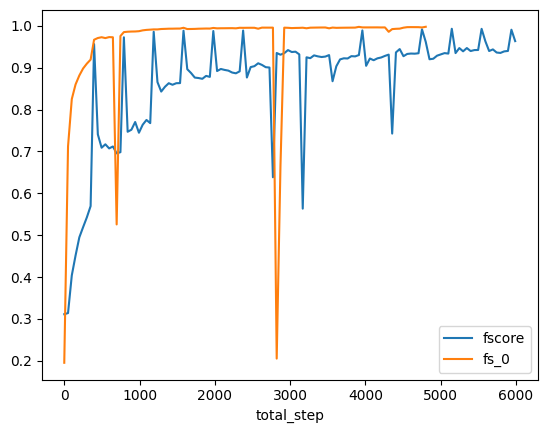

In [67]:
combine = df_train[["total_step", "fscore"]]
combine["fs_0"] = df_train1.reset_index()["fscore"][:len(df_train)]
combine.plot(x="total_step")

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\3417754895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine["accuracy_1"] = df_train1.reset_index()["recall"][:len(df_train)]


<Axes: xlabel='total_step'>

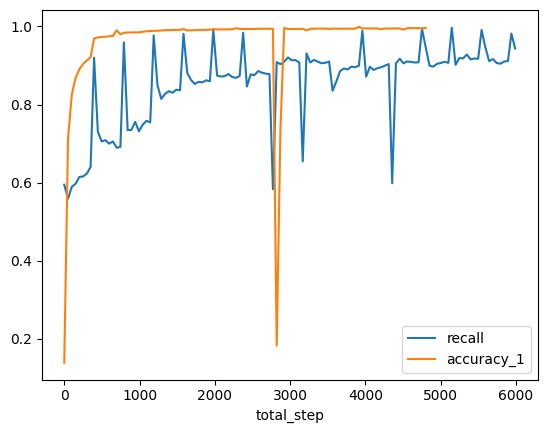

In [71]:
combine = df_train[["total_step", "recall"]]
combine["accuracy_1"] = df_train1.reset_index()["recall"][:len(df_train)]
combine.plot(x="total_step")


In [59]:
 df_train1

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,train,0,0,0.612954,0.108167,0.195218,0.332548,0.138163,0.781480,0
5,train,0,50,0.369715,0.595695,0.712048,0.730084,0.713568,0.930363,50
10,train,0,100,0.280676,0.742258,0.825042,0.838363,0.825627,0.958317,100
15,train,0,150,0.235285,0.792608,0.859975,0.871500,0.867941,0.968514,150
20,train,0,200,0.204130,0.822852,0.881346,0.892589,0.890047,0.974256,200
...,...,...,...,...,...,...,...,...,...,...
2939,train,28,150,0.001314,0.994081,0.996997,0.997667,0.996350,0.999439,11238
2944,train,28,200,0.001313,0.994389,0.997160,0.997875,0.996464,0.999436,11288
2949,train,28,250,0.001304,0.994477,0.997209,0.997973,0.996461,0.999440,11338
2954,train,28,300,0.001303,0.994511,0.997230,0.998002,0.996471,0.999441,11388


In [66]:
df_train1.reset_index()

,index,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,0,train,0,0,0.612954,0.108167,0.195218,0.332548,0.138163,0.781480,0
1,5,train,0,50,0.369715,0.595695,0.712048,0.730084,0.713568,0.930363,50
2,10,train,0,100,0.280676,0.742258,0.825042,0.838363,0.825627,0.958317,100
3,15,train,0,150,0.235285,0.792608,0.859975,0.871500,0.867941,0.968514,150
4,20,train,0,200,0.204130,0.822852,0.881346,0.892589,0.890047,0.974256,200
...,...,...,...,...,...,...,...,...,...,...,...
492,2939,train,28,150,0.001314,0.994081,0.996997,0.997667,0.996350,0.999439,11238
493,2944,train,28,200,0.001313,0.994389,0.997160,0.997875,0.996464,0.999436,11288
494,2949,train,28,250,0.001304,0.994477,0.997209,0.997973,0.996461,0.999440,11338
495,2954,train,28,300,0.001303,0.994511,0.997230,0.998002,0.996471,0.999441,11388


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np

<Axes: >

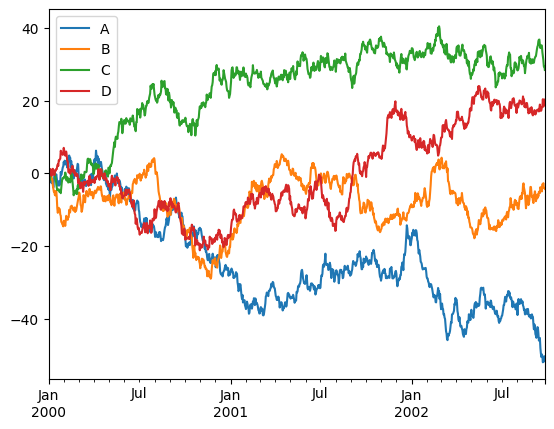

In [19]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot()

# df = df.cumsum()

# plt.figure();
# df.plot();

# df_train

In [102]:
def mean_of_epoch(df_src):
    epochs = df_src["epoch"].unique()
    
    columns=df_src.columns
    df_dst = pd.DataFrame(columns=columns)
    for epoch in epochs:
        df_dst.loc[epoch] = df_src[df_src["epoch"] == epoch].mean(numeric_only=True)
    
    return df_dst
    

# 第一个文件

<Axes: xlabel='epoch'>

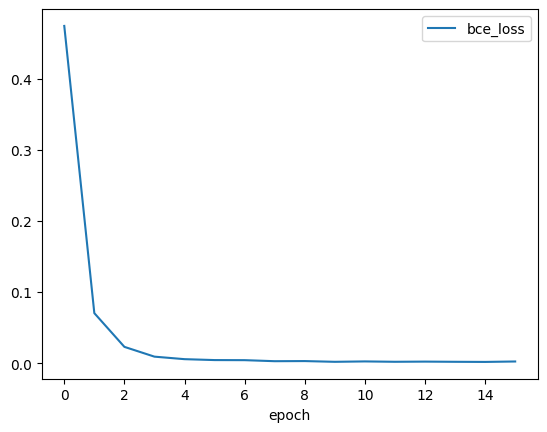

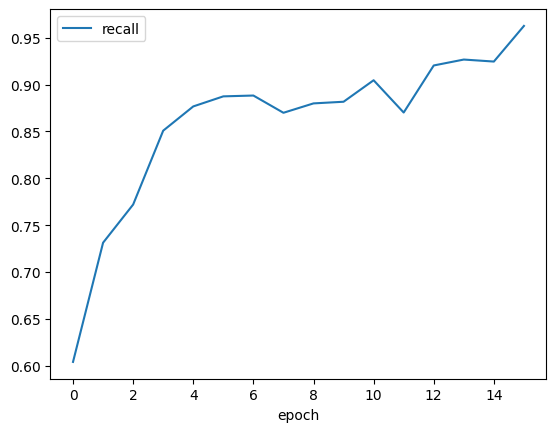

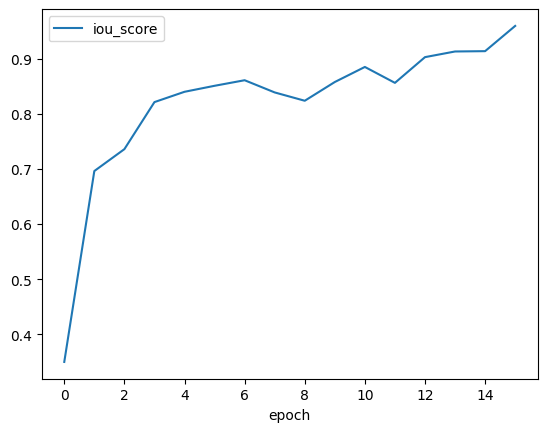

In [104]:
df_train_dst = mean_of_epoch(df_train)
df_train_dst.plot.line(x="epoch", y="bce_loss")
df_train_dst.plot.line(x="epoch", y="recall")
df_train_dst.plot.line(x="epoch", y="iou_score")

In [185]:
df_train_dst1 = mean_of_epoch(df_train1)
# df_train_dst1.plot.line(x="epoch", y="bce_loss")
# df_train_dst1.plot.line(x="epoch", y="recall")
# df_train_dst1.plot.line(x="epoch", y="iou_score")

In [186]:
plt.figure()
# df_train_dst.plot.line(x="epoch", y="bce_loss")
# df_train_dst1.plot.line(x="epoch", y="bce_loss")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [93]:
df_train[df_train["epoch"]==0]

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,train,0,0,0.818780,0.184299,0.311237,0.210795,0.594523,0.874412,0
1,train,0,50,0.638831,0.203522,0.313945,0.251441,0.558574,0.896727,50
2,train,0,100,0.525898,0.295436,0.403951,0.370891,0.589172,0.930972,100
3,train,0,150,0.448034,0.349871,0.451392,0.439887,0.596756,0.948383,150
4,train,0,200,0.394359,0.398124,0.494766,0.493809,0.614252,0.957650,200
5,train,0,250,0.354551,0.427809,0.519013,0.524175,0.615719,0.963788,250
6,train,0,300,0.320821,0.456834,0.542534,0.551439,0.622797,0.968608,300
7,train,0,350,0.293486,0.485357,0.569419,0.580135,0.640441,0.971833,350


In [170]:
df8 = df_train_dst
df9 = df_train_dst1
df8.loc[:, "key"] = 'trail1'
df9.loc[:, "key"] = 'trail2'
df8

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step,key
0,NaN,0.0,175.0,0.474345,0.350156,0.450782,0.427822,0.604029,0.939047,175.0,trail1
1,NaN,1.0,175.0,0.070414,0.696119,0.741915,0.765575,0.731286,0.995129,571.0,trail1
2,NaN,2.0,175.0,0.022997,0.735777,0.786593,0.857347,0.772023,0.996328,967.0,trail1
3,NaN,3.0,175.0,0.009222,0.821061,0.874631,0.930418,0.850878,0.997497,1363.0,trail1
4,NaN,4.0,175.0,0.005692,0.839728,0.894428,0.938359,0.876752,0.997906,1759.0,trail1
5,NaN,5.0,175.0,0.004404,0.850598,0.903791,0.944185,0.887497,0.998192,2155.0,trail1
6,NaN,6.0,175.0,0.004279,0.860684,0.911118,0.953073,0.888376,0.998224,2551.0,trail1
7,NaN,7.0,175.0,0.002833,0.838567,0.898544,0.937481,0.869973,0.998637,2947.0,trail1
8,NaN,8.0,175.0,0.002999,0.823495,0.881174,0.901516,0.879986,0.998602,3343.0,trail1
9,NaN,9.0,175.0,0.001963,0.857459,0.914978,0.962138,0.881750,0.998922,3739.0,trail1


In [171]:
df9

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step,key
0,NaN,0.0,158.333333,0.423154,0.622822,0.708668,0.701812,0.764021,0.900287,158.333333,trail2
1,NaN,1.0,175.000000,0.088422,0.949812,0.972246,0.975023,0.974277,0.994883,571.000000,trail2
2,NaN,2.0,175.000000,0.038525,0.900842,0.934202,0.915173,0.984903,0.996286,967.000000,trail2
3,NaN,3.0,175.000000,0.013160,0.977934,0.988503,0.990953,0.986796,0.997605,1363.000000,trail2
4,NaN,4.0,175.000000,0.006305,0.984965,0.992412,0.994678,0.990189,0.998300,1759.000000,trail2
5,NaN,5.0,175.000000,0.008342,0.980334,0.989319,0.993289,0.986913,0.997958,2155.000000,trail2
6,NaN,6.0,175.000000,0.003683,0.987663,0.993777,0.995789,0.991787,0.998604,2551.000000,trail2
7,NaN,7.0,175.000000,0.002852,0.989900,0.994916,0.996338,0.993514,0.998880,2947.000000,trail2
8,NaN,8.0,167.391304,0.002688,0.990350,0.995096,0.996696,0.993549,0.998907,3335.391304,trail2
9,NaN,9.0,175.000000,0.002476,0.989524,0.994050,0.995513,0.993972,0.999012,3739.000000,trail2


In [172]:
DF = pd.concat([df8,df9],keys=['trail1','trail2'])
DF

status  epoch        step  bce_loss  iou_score    fscore  \
trail1 0      NaN    0.0  175.000000  0.474345   0.350156  0.450782   
       1      NaN    1.0  175.000000  0.070414   0.696119  0.741915   
       2      NaN    2.0  175.000000  0.022997   0.735777  0.786593   
       3      NaN    3.0  175.000000  0.009222   0.821061  0.874631   
       4      NaN    4.0  175.000000  0.005692   0.839728  0.894428   
       5      NaN    5.0  175.000000  0.004404   0.850598  0.903791   
       6      NaN    6.0  175.000000  0.004279   0.860684  0.911118   
       7      NaN    7.0  175.000000  0.002833   0.838567  0.898544   
       8      NaN    8.0  175.000000  0.002999   0.823495  0.881174   
       9      NaN    9.0  175.000000  0.001963   0.857459  0.914978   
       10     NaN   10.0  175.000000  0.002519   0.884751  0.929899   
       11     NaN   11.0  175.000000  0.002004   0.855927  0.910690   
       12     NaN   12.0  175.000000  0.002252   0.902535  0.940450   
       13     NaN   13.0  175.000000  0.001983   0.912789  0.948081   
       14     NaN   14.0  175.000000  0.001810   0.913378  0.948706   
       15     NaN   15.0   25.000000  0.002426   0.959112  0.977055   
trail2 0      NaN    0.0  158.333333  0.423154   0.622822  0.708668   
       1      NaN    1.0  175.000000  0.088422   0.949812  0.972246   
       2      NaN    2.0  175.000000  0.038525   0.900842  0.934202   
       3      NaN    3.0  175.000000  0.013160   0.977934  0.988503   
       4      NaN    4.0  175.000000  0.006305   0.984965  0.992412   
       5      NaN    5.0  175.000000  0.008342   0.980334  0.989319   
       6      NaN    6.0  175.000000  0.003683   0.987663  0.993777   
       7      NaN    7.0  175.000000  0.002852   0.989900  0.994916   
       8      NaN    8.0  167.391304  0.002688   0.990350  0.995096   
       9      NaN    9.0  175.000000  0.002476   0.989524  0.994050   
       10     NaN   10.0  175.000000  0.002358   0.991477  0.995712   
       11     NaN   11.0  175.000000  0.002337   0.989795  0.993886   
       12     NaN   12.0  175.000000  0.002100   0.990413  0.994498   
       13     NaN   13.0  175.000000  0.001727   0.993332  0.996650   
       14     NaN   14.0  175.000000  0.001708   0.993611  0.996793   
       15     NaN   15.0  175.000000  0.001669   0.993975  0.996977   
       16     NaN   16.0  175.000000  0.001551   0.994238  0.997109   
       17     NaN   17.0  175.000000  0.001490   0.994291  0.997047   
       18     NaN   18.0  175.000000  0.001478   0.994613  0.997298   
       19     NaN   19.0  175.000000  0.001391   0.994842  0.997413   
       20     NaN   20.0  175.000000  0.001316   0.993675  0.996774   
       21     NaN   21.0  175.000000  0.001342   0.994722  0.997352   
       22     NaN   22.0  175.000000  0.001306   0.994664  0.997322   
       23     NaN   23.0  175.000000  0.001239   0.995381  0.997684   
       24     NaN   24.0  175.000000  0.001195   0.994950  0.997448   
       25     NaN   25.0  175.000000  0.001143   0.995537  0.997762   
       26     NaN   26.0  175.000000  0.001122   0.995492  0.997740   
       27     NaN   27.0  175.000000  0.001196   0.994890  0.997121   
       28     NaN   28.0  175.000000  0.001115   0.995537  0.997751   
       29     NaN   29.0  175.000000  0.000930   0.996657  0.998325   
       30     NaN   30.0  175.000000  0.000962   0.996620  0.998306   

           precision    recall  accuracy    total_step     key  
trail1 0    0.427822  0.604029  0.939047    175.000000  trail1  
       1    0.765575  0.731286  0.995129    571.000000  trail1  
       2    0.857347  0.772023  0.996328    967.000000  trail1  
       3    0.930418  0.850878  0.997497   1363.000000  trail1  
       4    0.938359  0.876752  0.997906   1759.000000  trail1  
       5    0.944185  0.887497  0.998192   2155.000000  trail1  
       6    0.953073  0.888376  0.998224   2551.000000  trail1  
       7    0.937481  0.869973  0.998637   2947.000000  trail1  
       8    0.901

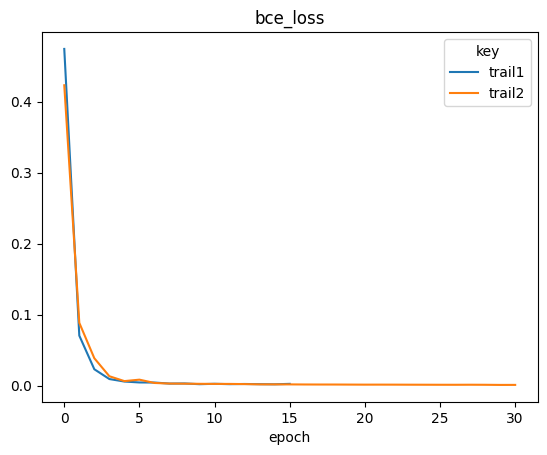

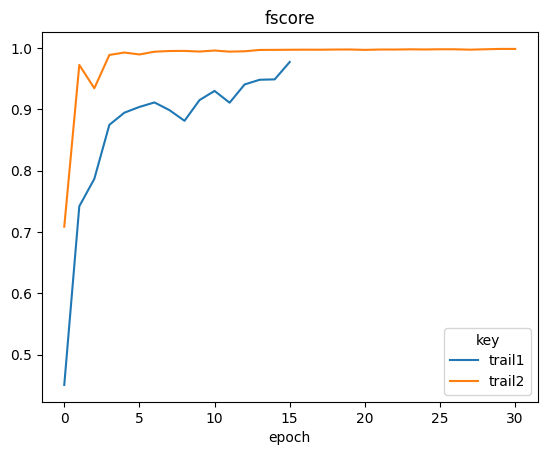

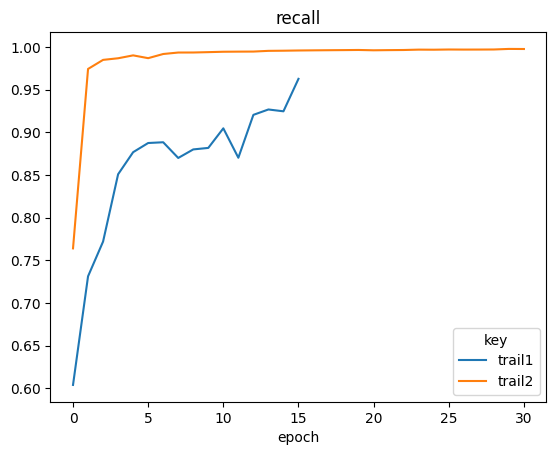

In [176]:
DFGroup = DF.groupby(['epoch','key'])

for metric in ["bce_loss", "fscore", "recall"]: #, "fscore", "recall", "precision", "accuracy"]:
    DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

In [175]:
 DFGroup.sum().unstack('key')
# DFGroup.sum().unstack('key')
# for x,y in DFGroup:
#     print(y)
# DF

status          step              bce_loss           iou_score  \
key   trail1 trail2 trail1      trail2    trail1    trail2    trail1   
epoch                                                                  
0.0      0.0    0.0  175.0  158.333333  0.474345  0.423154  0.350156   
1.0      0.0    0.0  175.0  175.000000  0.070414  0.088422  0.696119   
2.0      0.0    0.0  175.0  175.000000  0.022997  0.038525  0.735777   
3.0      0.0    0.0  175.0  175.000000  0.009222  0.013160  0.821061   
4.0      0.0    0.0  175.0  175.000000  0.005692  0.006305  0.839728   
5.0      0.0    0.0  175.0  175.000000  0.004404  0.008342  0.850598   
6.0      0.0    0.0  175.0  175.000000  0.004279  0.003683  0.860684   
7.0      0.0    0.0  175.0  175.000000  0.002833  0.002852  0.838567   
8.0      0.0    0.0  175.0  167.391304  0.002999  0.002688  0.823495   
9.0      0.0    0.0  175.0  175.000000  0.001963  0.002476  0.857459   
10.0     0.0    0.0  175.0  175.000000  0.002519  0.002358  0.884751   
11.0     0.0    0.0  175.0  175.000000  0.002004  0.002337  0.855927   
12.0     0.0    0.0  175.0  175.000000  0.002252  0.002100  0.902535   
13.0     0.0    0.0  175.0  175.000000  0.001983  0.001727  0.912789   
14.0     0.0    0.0  175.0  175.000000  0.001810  0.001708  0.913378   
15.0     0.0    0.0   25.0  175.000000  0.002426  0.001669  0.959112   
16.0     NaN    0.0    NaN  175.000000       NaN  0.001551       NaN   
17.0     NaN    0.0    NaN  175.000000       NaN  0.001490       NaN   
18.0     NaN    0.0    NaN  175.000000       NaN  0.001478       NaN   
19.0     NaN    0.0    NaN  175.000000       NaN  0.001391       NaN   
20.0     NaN    0.0    NaN  175.000000       NaN  0.001316       NaN   
21.0     NaN    0.0    NaN  175.000000       NaN  0.001342       NaN   
22.0     NaN    0.0    NaN  175.000000       NaN  0.001306       NaN   
23.0     NaN    0.0    NaN  175.000000       NaN  0.001239       NaN   
24.0     NaN    0.0    NaN  175.000000       NaN  0.001195       NaN   
25.0     NaN    0.0    NaN  175.000000       NaN  0.001143       NaN   
26.0     NaN    0.0    NaN  175.000000       NaN  0.001122       NaN   
27.0     NaN    0.0    NaN  175.000000       NaN  0.001196       NaN   
28.0     NaN    0.0    NaN  175.000000       NaN  0.001115       NaN   
29.0     NaN    0.0    NaN  175.000000       NaN  0.000930       NaN   
30.0     NaN    0.0    NaN  175.000000       NaN  0.000962       NaN   

                   fscore           precision              recall            \
key      trail2    trail1    trail2    trail1    trail2    trail1    trail2   
epoch                                                                         
0.0    0.622822  0.450782  0.708668  0.427822  0.701812  0.604029  0.764021   
1.0    0.949812  0.741915  0.972246  0.765575  0.975023  0.731286  0.974277   
2.0    0.900842  0.786593  0.934202  0.857347  0.915173  0.772023  0.984903   
3.0    0.977934  0.874631  0.988503  0.930418  0.990953  0.850878  0.986796   
4.0    0.984965  0.894428  0.992412  0.938359  0.994678  0.876752  0.990189   
5.0    0.980334  0.903791  0.989319  0.944185  0.993289  0.887497  0.986913   
6.0    0.987663  0.911118  0.993777  0.953073  0.995789  0.888376  0.991787   
7.0    0.989900  0.898544  0.994916  0.937481  0.996338  0.869973  0.993514   
8.0    0.990350  0.881174  0.995096  0.901516  0.996696  0.879986  0.993549   
9.0    0.989524  0.914978  0.994050  0.962138  0.995513  0.881750  0.993972   
10.0   0.991477  0.929899  0.995712  0.971231  0.997012  0.904697  0.994431   
11.0   0.989795  0.910690  0.993886  0.975481  0.995196  0.870225  0.994566   
12.0   0.990413  0.940450  0.994498  0.974669  0.995644  0.920475  0.994643   
13.0   0.993332  0.948081  0.996650  0.981399  0.997828  0.926788  0.995481   
14.0   0.993611  0.948706  0.996793  0.982733  0.997939  0.924645  0.995651   
15.0   0.993975  0.977055  0.996977  0.995039  0.998049  0.962686  0.995909   
16.0   0.994238       NaN  0.997109       NaN  0.998140 

In [150]:
DFGroup["fscore"]

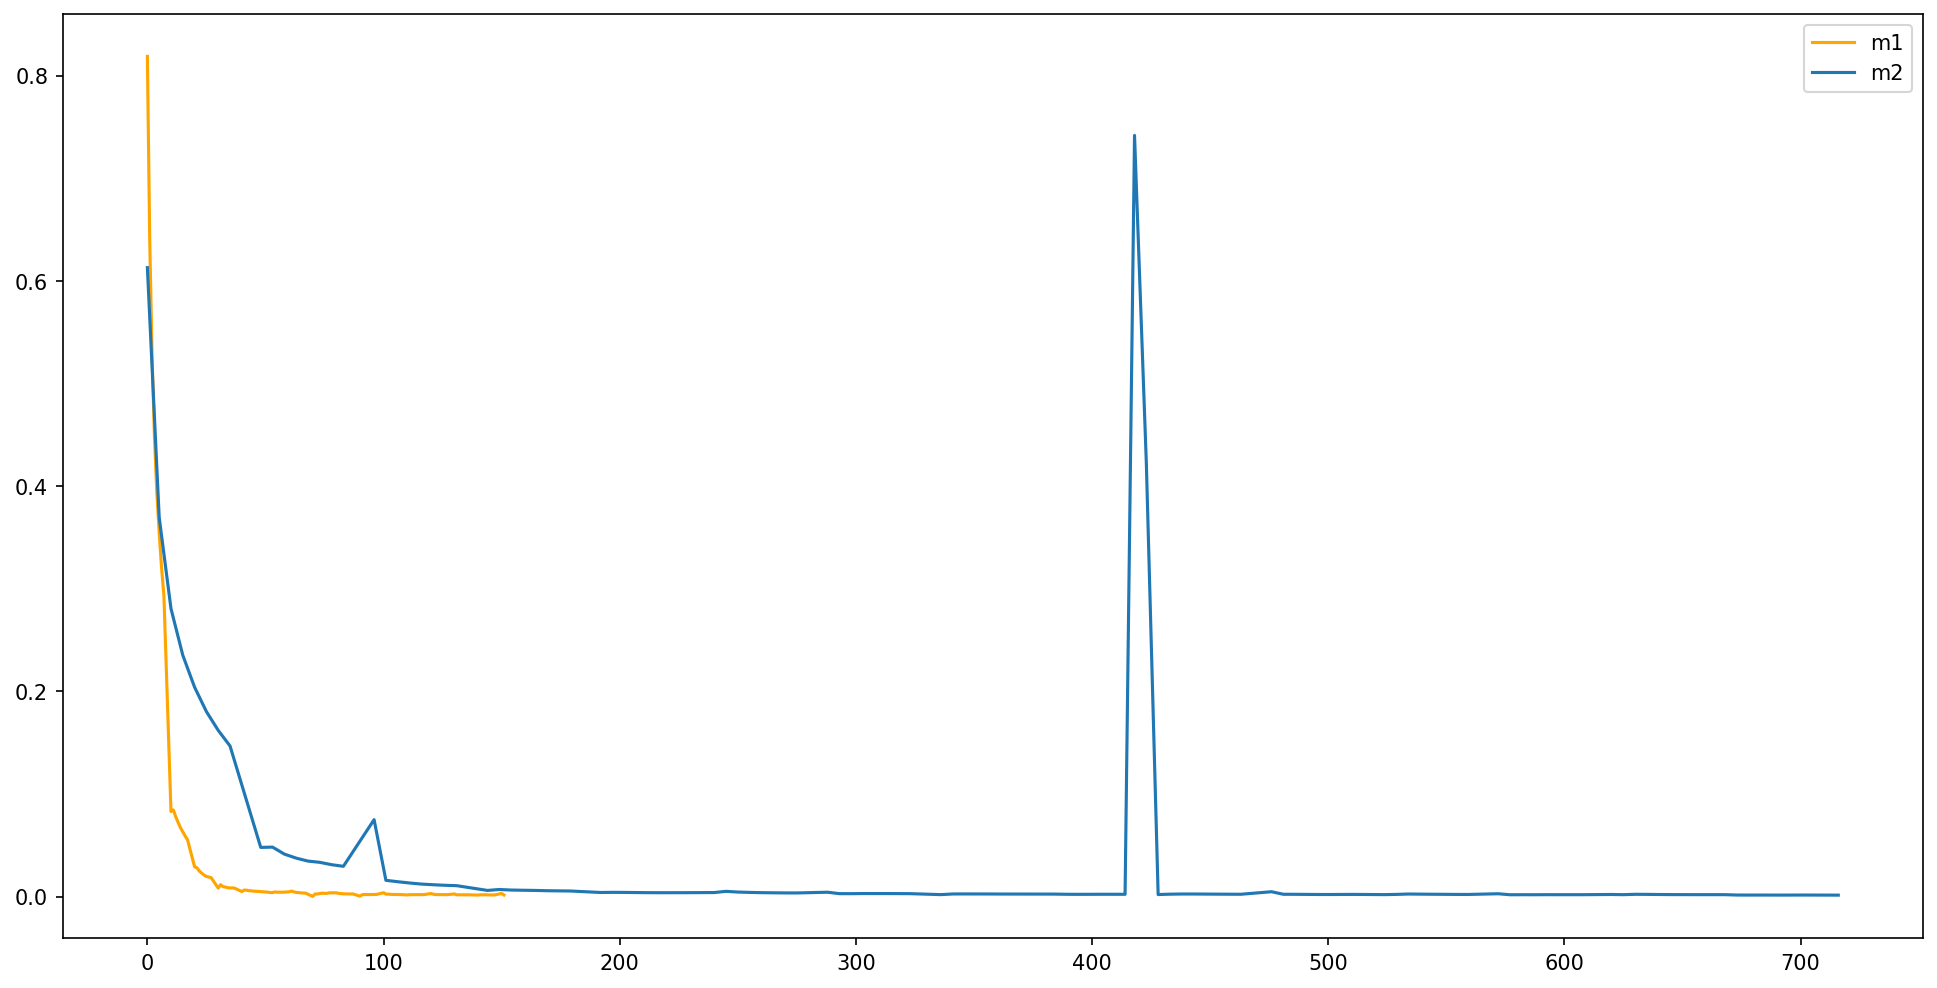

In [160]:
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df_train['bce_loss'].plot(label='m1', color='orange')
df_train1['bce_loss'][:len(df_train)].plot(label='m2')
# ford['Open'].plot(label='Ford')
  
# adding title to the plot
# plt.title('Open Price Plot')
  
# # adding Label to the x-axis
# plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

['tu-regnety_040_MANet_0', 'tu-regnety_040_MANet_1']


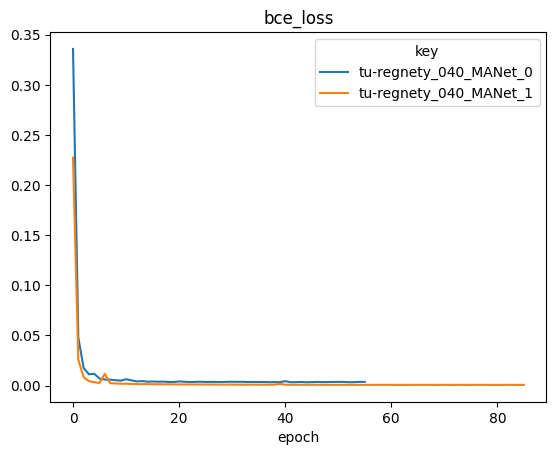

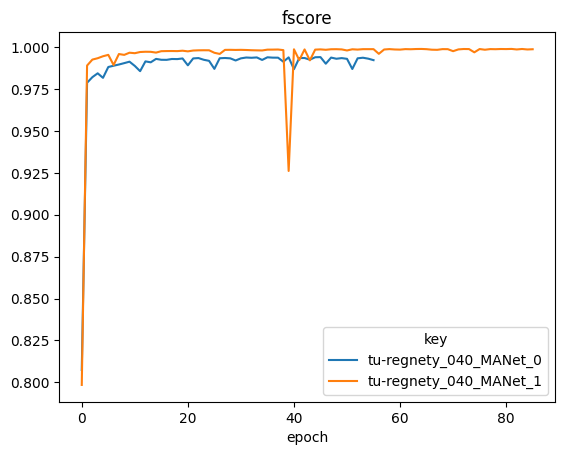

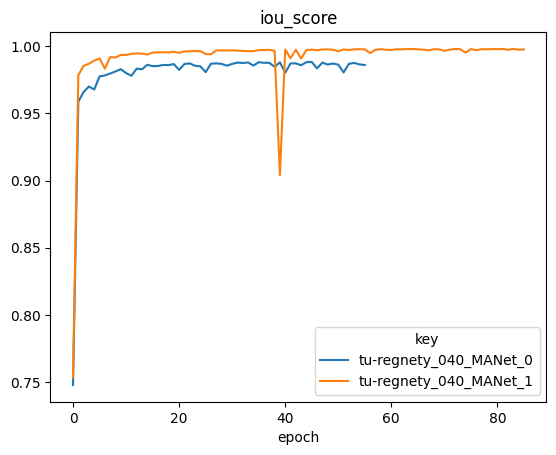

In [447]:
# log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json"
#     ]

log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
            ### 
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_133848.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_162347.json",
#         "D:\\project\\TrueHealth\\git\\segmentation_models.pytorch\\output\\logs\\resnext101_32x4d\\resnext101_32x4d_logs_0321_092203.json",

    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet\efficientnet-b4_Unet_logs_0322_145204.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json",
# #         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_Unet_logs_0322_183333.json",
        "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet\\tu-regnety_040_MANet_logs_0321_173313.json",
        "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet\\tu-regnety_040_MANet_logs_0323_183024.json"
        
    ]
    
df_list = []
model_names = []
for idx, file in enumerate(log_files):
    name = file.split("\\")[-2]
#     if name in model_names:
    model_names.append("{}_{}" .format(name, idx))
    info = parse_jsonline_file(file)
    df = pd.DataFrame.from_records(info)
    df_train = df[df["status"] == "train"]
    df_list.append(df_train)
print(model_names)

df_epoch_list = []
ex_keys = []
# for idx, df in enumerate(df_list):
#     df_dst = mean_of_epoch(df)
#     key = 'trail{}'. format(idx)
#     df_dst.loc[:, "key"] = key
#     ex_keys.append(key)
#     df_epoch_list.append(df_dst)

# DF = pd.concat(df_epoch_list, keys=ex_keys)

for model_name, df in zip(model_names, df_list):
    df_dst = mean_of_epoch(df)
    key = model_name
    df_dst.loc[:, "key"] = key
    ex_keys.append(key)
    df_epoch_list.append(df_dst)
    
DF = pd.concat(df_epoch_list, keys=ex_keys)
DFGroup = DF.groupby(['epoch','key'])

for metric in ["bce_loss", "fscore", "iou_score"]: #, "fscore", "recall", "precision", "accuracy"]:
    DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

# ddff = DFGroup.sum().unstack('key')
# ddff = ddff.drop("total_step", axis=1)
# ddff = ddff.drop("step", axis=1)
# ddff.plot(kind="line")

In [318]:
ddff

,status,step,bce_loss,iou_score,fscore,precision,recall,accuracy
key,trail0,trail0,trail0,trail0,trail0,trail0,trail0,trail0
epoch,,,,,,,,
0.0,0.0,175.0,0.352822,0.493084,0.588161,0.671332,0.549491,0.918105
1.0,0.0,175.0,0.048267,0.942983,0.970150,0.976144,0.965792,0.992227
2.0,0.0,175.0,0.020469,0.955029,0.976183,0.977375,0.977049,0.994315
3.0,0.0,175.0,0.010230,0.970507,0.984971,0.988717,0.981436,0.995363
4.0,0.0,175.0,0.008735,0.966629,0.980629,0.983595,0.982311,0.995422
5.0,0.0,175.0,0.007837,0.974421,0.986969,0.989654,0.984488,0.995671
6.0,0.0,175.0,0.006613,0.976159,0.987901,0.991746,0.984169,0.995852
7.0,0.0,175.0,0.006994,0.977312,0.988492,0.991609,0.985474,0.995716


In [284]:
DF

status  epoch   step  bce_loss  iou_score    fscore  precision  \
trail0 0      NaN    0.0  175.0  0.474345   0.350156  0.450782   0.427822   
       1      NaN    1.0  175.0  0.070414   0.696119  0.741915   0.765575   
       2      NaN    2.0  175.0  0.022997   0.735777  0.786593   0.857347   
       3      NaN    3.0  175.0  0.009222   0.821061  0.874631   0.930418   
       4      NaN    4.0  175.0  0.005692   0.839728  0.894428   0.938359   
       5      NaN    5.0  175.0  0.004404   0.850598  0.903791   0.944185   
       6      NaN    6.0  175.0  0.004279   0.860684  0.911118   0.953073   
       7      NaN    7.0  175.0  0.002833   0.838567  0.898544   0.937481   
       8      NaN    8.0  175.0  0.002999   0.823495  0.881174   0.901516   
       9      NaN    9.0  175.0  0.001963   0.857459  0.914978   0.962138   
       10     NaN   10.0  175.0  0.002519   0.884751  0.929899   0.971231   
       11     NaN   11.0  175.0  0.002004   0.855927  0.910690   0.975481   
       12     NaN   12.0  175.0  0.002252   0.902535  0.940450   0.974669   
       13     NaN   13.0  175.0  0.001983   0.912789  0.948081   0.981399   
       14     NaN   14.0  175.0  0.001810   0.913378  0.948706   0.982733   
       15     NaN   15.0   25.0  0.002426   0.959112  0.977055   0.995039   
trail1 0      NaN    0.0  195.0  0.496111   0.653582  0.748916   0.707594   
       1      NaN    1.0  195.0  0.135057   0.952370  0.974723   0.977004   
       2      NaN    2.0  195.0  0.049521   0.956465  0.974803   0.972189   
       3      NaN    3.0  195.0  0.020208   0.973898  0.985997   0.988199   
       4      NaN    4.0  195.0  0.008545   0.983268  0.991545   0.993859   
       5      NaN    5.0  195.0  0.010776   0.978064  0.987311   0.990448   
       6      NaN    6.0  195.0  0.004138   0.986923  0.993409   0.995659   
       7      NaN    7.0  195.0  0.003402   0.988832  0.994334   0.996304   
       8      NaN    8.0  195.0  0.003089   0.989698  0.994814   0.996641   
       9      NaN    9.0  195.0  0.002672   0.987903  0.992673   0.994368   
       10     NaN   10.0  195.0  0.002554   0.990008  0.994964   0.996803   
       11     NaN   11.0  195.0  0.002378   0.991591  0.995776   0.997187   
       12     NaN   12.0  195.0  0.002562   0.988057  0.992821   0.993714   
       13     NaN   13.0  195.0  0.001931   0.992494  0.996227   0.997440   
       14     NaN   14.0  195.0  0.001840   0.993273  0.996624   0.997865   
       15     NaN   15.0  195.0  0.001806   0.993394  0.996685   0.997922   
       16     NaN   16.0  195.0  0.001706   0.993578  0.996777   0.997908   
       17     NaN   17.0  195.0  0.001681   0.993275  0.996305   0.997386   
       18     NaN   18.0  195.0  0.001600   0.994146  0.997063   0.998116   
       19     NaN   19.0  195.0  0.001569   0.994306  0.997144   0.998179   
       20     NaN   20.0  195.0  0.001512   0.992907  0.996353   0.996838   
       21     NaN   21.0  195.0  0.001438   0.994471  0.997227   0.998261   
       22     NaN   22.0  195.0  0.001423   0.994486  0.997233   0.998128   
       23     NaN   23.0  195.0  0.001402   0.994559  0.997270   0.998167   
       24     NaN   24.0  195.0  0.001387   0.994867  0.997425   0.998320   
       25     NaN   25.0  195.0  0.001339   0.994816  0.997399   0.998252   
       26     NaN   26.0  195.0  0.001342   0.994926  0.997455   0.998329   
       27     NaN   27.0  195.0  0.001338   0.993604  0.996092   0.996942   
       28     NaN   28.0  195.0  0.001312   0.994358  0.997145   0.997865   

             recall  accuracy     key  
trail0 0   0.604029  0.939047  trail0  
       1   0.731286  0.995129  trail0  
       2   0.772023  0.996328  trail0  
       3   0.850878  0.997497  trail0  
       4   0.876752  0.997906  trail0  
       5   0.887497  0.998192  trail0  
       6   0.888376  0.998224  trail0  
       7   0.869973  0.998637  trail0  
       8   0.879986  0.998602  trail0  
       9   0.881750  0.998922  trail0  
       10  0.904697  0.99870

In [206]:
DFGroup.sum().unstack('key')

status               step         bce_loss           iou_score  \
key   trail0 trail1      trail0 trail1    trail0    trail1    trail0   
epoch                                                                  
0.0      0.0    0.0  178.333333  175.0  0.382174  0.474345  0.675120   
1.0      0.0    0.0  195.000000  175.0  0.086150  0.070414  0.948695   
2.0      0.0    0.0  195.000000  175.0  0.032159  0.022997  0.953948   
3.0      0.0    0.0  195.000000  175.0  0.013187  0.009222  0.977748   
4.0      0.0    0.0  195.000000  175.0  0.006301  0.005692  0.984815   
5.0      0.0    0.0  195.000000  175.0  0.007464  0.004404  0.982159   
6.0      0.0    0.0  195.000000  175.0  0.003614  0.004279  0.987915   
7.0      0.0    0.0  195.000000  175.0  0.002865  0.002833  0.989923   
8.0      0.0    0.0  186.052632  175.0  0.002625  0.002999  0.990542   
9.0      0.0    0.0  195.000000  175.0  0.002522  0.001963  0.989553   
10.0     0.0    0.0  195.000000  175.0  0.002277  0.002519  0.991244   
11.0     0.0    0.0  195.000000  175.0  0.002261  0.002004  0.989411   
12.0     0.0    0.0  195.000000  175.0  0.002113  0.002252  0.990565   
13.0     0.0    0.0  195.000000  175.0  0.001715  0.001983  0.993218   
14.0     0.0    0.0  195.000000  175.0  0.001676  0.001810  0.993653   
15.0     0.0    0.0  195.000000   25.0  0.001637  0.002426  0.993887   
16.0     0.0    NaN  195.000000    NaN  0.001543       NaN  0.994166   
17.0     0.0    NaN  195.000000    NaN  0.001507       NaN  0.994058   
18.0     0.0    NaN  195.000000    NaN  0.001441       NaN  0.994525   
19.0     0.0    NaN  195.000000    NaN  0.001396       NaN  0.994774   
20.0     0.0    NaN  195.000000    NaN  0.001349       NaN  0.994128   
21.0     0.0    NaN  195.000000    NaN  0.001322       NaN  0.994861   
22.0     0.0    NaN  195.000000    NaN  0.001314       NaN  0.994766   
23.0     0.0    NaN  195.000000    NaN  0.001230       NaN  0.995297   
24.0     0.0    NaN  195.000000    NaN  0.001202       NaN  0.994653   
25.0     0.0    NaN  195.000000    NaN  0.001158       NaN  0.995528   
26.0     0.0    NaN  195.000000    NaN  0.001140       NaN  0.995478   
27.0     0.0    NaN  195.000000    NaN  0.001142       NaN  0.994887   
28.0     0.0    NaN  195.000000    NaN  0.001127       NaN  0.995376   
29.0     0.0    NaN  195.000000    NaN  0.000943       NaN  0.996515   
30.0     0.0    NaN  195.000000    NaN  0.000922       NaN  0.996590   

                   fscore           precision              recall            \
key      trail1    trail0    trail1    trail0    trail1    trail0    trail1   
epoch                                                                         
0.0    0.350156  0.762557  0.450782  0.750208  0.427822  0.817843  0.604029   
1.0    0.696119  0.971225  0.741915  0.974214  0.765575  0.973970  0.731286   
2.0    0.735777  0.972449  0.786593  0.970078  0.857347  0.983502  0.772023   
3.0    0.821061  0.988343  0.874631  0.990732  0.930418  0.986834  0.850878   
4.0    0.839728  0.992335  0.894428  0.994599  0.938359  0.990116  0.876752   
5.0    0.850598  0.990183  0.903791  0.992814  0.944185  0.989230  0.887497   
6.0    0.860684  0.993903  0.911118  0.995909  0.953073  0.991920  0.888376   
7.0    0.838567  0.994911  0.898544  0.996531  0.937481  0.993340  0.869973   
8.0    0.823495  0.995189  0.881174  0.996748  0.901516  0.993685  0.879986   
9.0    0.857459  0.994119  0.914978  0.995568  0.962138  0.993945  0.881750   
10.0   0.884751  0.995593  0.929899  0.997132  0.971231  0.994076  0.904697   
11.0   0.855927  0.993462  0.910690  0.994787  0.975481  0.994590  0.870225   
12.0   0.902535  0.994642  0.940450  0.995636  0.974669  0.994806  0.920475   
13.0   0.912789  0.996592  0.948081  0.997724  0.981399  0.995470  0.926788   
14.0   0.913378  0.996814  0.948706  0.997933  0.982733  0.995700  0.924645   
15.0   0.959112  0.996932  0.977055  0.998050  0.995039  0.995820  0.962686   
16.0        NaN  0.997073       NaN  0.998074       NaN 

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\767529787.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ddff = DFGroup.sum().unstack('key')


<Axes: xlabel='total_step'>

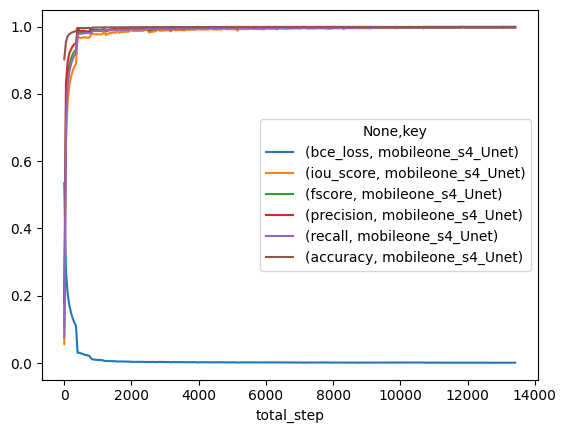

In [428]:
log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json", ##eg
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_133848.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_162347.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json"
#         "D:\share\efficientnet-b4_logs_0317_095242.json",
    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet\\tu-regnety_040_MANet_logs_0321_173313.json",
        "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_logs_0315.json",
        
    ]
steps_per_epoch = 396 ##根据数据及batch-size计算出来的
# steps_per_epoch = 20904
df_list = []
model_names = []
## differnet experiment
for file in log_files:
    name = file.split("\\")[-2]
    model_names.append(name)
    info = parse_jsonline_file(file)
    df = pd.DataFrame.from_records(info)
    df_train = df[df["status"] == "train"]
    df_list.append(df_train)

# ## train and valid####
# info = parse_jsonline_file(file)
# df = pd.DataFrame.from_records(info)
# df_train = df[df["status"] == "train"]
# df_list.append(df_train)
# df_valid = df[df["status"] == "valid"]
# df_list.append(df_valid)


df_epoch_list = []
ex_keys = []
for model_name, df_tmp in zip(model_names, df_list):
    df_tmp = df_tmp[df_tmp["step"] % 50 == 0]
    df_tmp = df_tmp.reset_index()
    df_tmp = df_tmp.drop("index", axis=1)
    df_tmp["total_step"] = df_tmp["step"]
    df_tmp["total_step"] = df_tmp.apply(
        lambda x: myfunction(x["epoch"]*steps_per_epoch,  x['step']), 
        axis=1
    )
    df_dst = df_tmp
    # df_dst = mean_of_epoch(df)
#     key = 'trail{}'. format(idx)
    key = model_name
    df_dst.loc[:, "key"] = key
    ex_keys.append(key)
    df_epoch_list.append(df_dst)

DF = pd.concat(df_epoch_list, keys=ex_keys)
# DFGroup = DF.groupby(['total_step','key'])
DFGroup = DF.groupby(['total_step', "key"])
# DF1 = DF.drop(["epoch", "step", "status"], axis=1)
# DFGroup = DF1.groupby(['total_step','key'])

# for metric in ["bce_loss", "fscore", "recall"]: #, "fscore", "recall", "precision", "accuracy"]:
#     DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

# DFGPlot = DFGroup.sum().unstack('key').plot(kind='line')
# ddff = DFGroup.sum().unstack('key')
ddff = DFGroup.sum().unstack('key')
ddff = ddff.drop("epoch", axis=1)
ddff = ddff.drop("step", axis=1)
ddff.plot(kind="line")

In [427]:
dfp = df_list[0]
dfp = dfp[dfp["step"] % 50 == 0]
df_epoch_list[0]
list(DF["total_step"])
DF

status  epoch  step  bce_loss  iou_score    fscore  \
mobileone_s4_Unet 0    train      0     0  0.785930   0.070443  0.131615   
                  1    train      0    50  0.422097   0.597123  0.726770   
                  2    train      0   100  0.311063   0.741970  0.832855   
                  3    train      0   150  0.255846   0.803382  0.875683   
                  4    train      0   200  0.223049   0.832281  0.895839   
...                      ...    ...   ...       ...        ...       ...   
                  275  train     33   150  0.000801   0.996865  0.998430   
                  276  train     33   200  0.000811   0.996866  0.998430   
                  277  train     33   250  0.000814   0.996825  0.998409   
                  278  train     33   300  0.000811   0.996857  0.998426   
                  279  train     33   350  0.000816   0.996894  0.998444   

                       precision    recall  accuracy  total_step  \
mobileone_s4_Unet 0     0.084186  0.301435  0.726953           0   
                  1     0.650721  0.858037  0.921692          50   
                  2     0.797532  0.897563  0.953216         100   
                  3     0.854699  0.916787  0.965632         150   
                  4     0.880259  0.927640  0.972003         200   
...                          ...       ...       ...         ...   
                  275   0.998966  0.997895  0.999654       13218   
                  276   0.998964  0.997897  0.999650       13268   
                  277   0.998941  0.997879  0.999649       13318   
                  278   0.998963  0.997889  0.999650       13368   
                  279   0.998974  0.997915  0.999648       13418   

                                     key  
mobileone_s4_Unet 0    mobileone_s4_Unet  
                  1    mobileone_s4_Unet  
                  2    mobileone_s4_Unet  
                  3    mobileone_s4_Unet  
                  4    mobileone_s4_Unet  
...                                  ...  
                  275  mobileone_s4_Unet  
                  276  mobileone_s4_Unet  
                  277  mobileone_s4_Unet  
                  278  mobileone_s4_Unet  
                  279  mobileone_s4_Unet  

[280 rows x 11 columns]

In [420]:
DFGroup.sum().unstack('key')


C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\3967880460.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFGroup.sum().unstack('key')


,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy
key,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet
total_step,,,,,,,,
0,0,0,1.321133,0.126654,0.238053,0.260563,0.377652,1.629902
50,0,100,0.696072,1.249538,1.479344,1.481781,1.565137,1.875970
100,0,200,0.517568,1.518454,1.682427,1.692606,1.720095,1.924815
150,0,300,0.427857,1.629109,1.761751,1.775218,1.782297,1.943669
200,0,400,0.372850,1.682644,1.800242,1.812413,1.815722,1.953409
...,...,...,...,...,...,...,...,...
13218,33,150,0.000801,0.996865,0.998430,0.998966,0.997895,0.999654
13268,33,200,0.000811,0.996866,0.998430,0.998964,0.997897,0.999650


In [269]:
DF1["total_step"]

trail0  0          0
        1         50
        2        100
        3        150
        4        200
               ...  
trail1  227     9950
        228    10000
        229    10050
        230    10100
        231    10150
Name: total_step, Length: 354, dtype: int64

In [287]:
DFGroup.sum().unstack('key')

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\2540715877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFGroup.sum().unstack('key')


,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy
key,trail0,trail0,trail0,trail0,trail0,trail0,trail0,trail0
total_step,,,,,,,,
0,0,0,0.818780,0.184299,0.311237,0.210795,0.594523,0.874412
50,0,50,0.638831,0.203522,0.313945,0.251441,0.558574,0.896727
100,0,100,0.525898,0.295436,0.403951,0.370891,0.589172,0.930972
150,0,150,0.448034,0.349871,0.451392,0.439887,0.596756,0.948383
200,0,200,0.394359,0.398124,0.494766,0.493809,0.614252,0.957650
...,...,...,...,...,...,...,...,...
5794,14,250,0.001775,0.891282,0.935232,0.979283,0.904564,0.998943
5844,14,300,0.001740,0.897082,0.938926,0.980187,0.910047,0.998974


In [265]:
DFGroup.sum().unstack('key').sort_values(by="total_step")

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\1003715224.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFGroup.sum().unstack('key').sort_values(by="total_step")


epoch          step         bce_loss           iou_score  \
key        trail0 trail1 trail0 trail1    trail0    trail1    trail0   
total_step                                                             
0             0.0    0.0    0.0    0.0  0.818780  0.969886  0.184299   
50            0.0    0.0   50.0   50.0  0.638831  0.669675  0.203522   
100           0.0    0.0  100.0  100.0  0.525898  0.549575  0.295436   
150           0.0    0.0  150.0  150.0  0.448034  0.486414  0.349871   
200           0.0    0.0  200.0  200.0  0.394359  0.439603  0.398124   
...           ...    ...    ...    ...       ...       ...       ...   
9950          NaN   28.0    NaN  150.0       NaN  0.001314       NaN   
10000         NaN   28.0    NaN  200.0       NaN  0.001313       NaN   
10050         NaN   28.0    NaN  250.0       NaN  0.001304       NaN   
10100         NaN   28.0    NaN  300.0       NaN  0.001303       NaN   
10150         NaN   28.0    NaN  350.0       NaN  0.001284       NaN   

                        fscore           precision              recall  \
key           trail1    trail0    trail1    trail0    trail1    trail0   
total_step                                                               
0           0.133152  0.311237  0.235011  0.210795  0.150294  0.594523   
50          0.402960  0.313945  0.555307  0.251441  0.454619  0.558574   
100         0.586868  0.403951  0.708979  0.370891  0.650747  0.589172   
150         0.679038  0.451392  0.778321  0.439887  0.743002  0.596756   
200         0.739666  0.494766  0.823411  0.493809  0.798500  0.614252   
...              ...       ...       ...       ...       ...       ...   
9950        0.994081       NaN  0.996997       NaN  0.997667       NaN   
10000       0.994389       NaN  0.997160       NaN  0.997875       NaN   
10050       0.994477       NaN  0.997209       NaN  0.997973       NaN   
10100       0.994511       NaN  0.997230       NaN  0.998002       NaN   
10150       0.994626       NaN  0.997290       NaN  0.998070       NaN   

                      accuracy            
key           trail1    trail0    trail1  
total_step                                
0           0.538614  0.874412  0.523947  
50          0.779582  0.896727  0.836485  
100         0.841322  0.930972  0.902409  
150         0.870492  0.948383  0.929854  
200         0.891408  0.957650  0.944757  
...              ...       ...       ...  
9950        0.996350       NaN  0.999439  
10000       0.996464       NaN  0.999436  
10050       0.996461       NaN  0.999440  
10100       0.996471       NaN  0.999441  
10150       0.996522       NaN  0.999449  

[204 rows x 16 columns]

In [ ]:
## train and valid

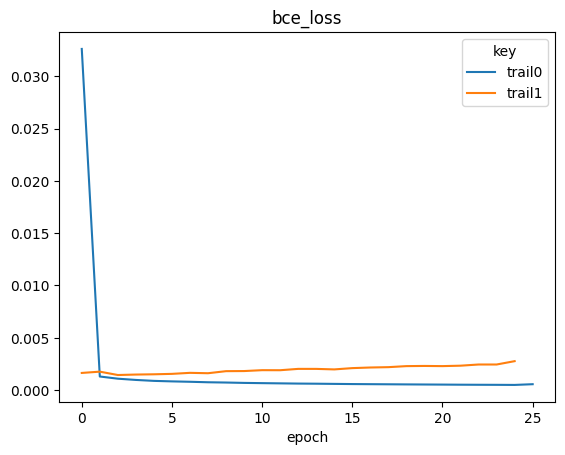

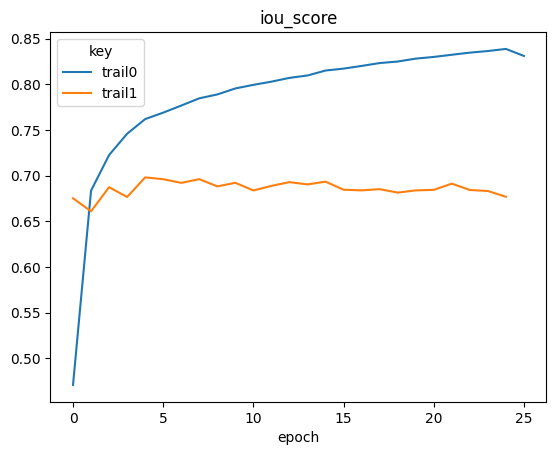

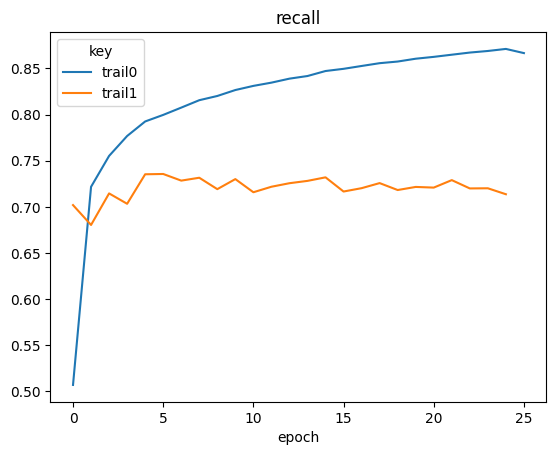

In [437]:
# log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json"
#     ]

log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
        "D:\share\efficientnet-b4_logs_0317_095242.json", ##支气管 linux
#          "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_162347.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json",
    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet\efficientnet-b4_Unet_logs_0322_145204.json"
        
    ]
    
df_list = []
# for file in log_files:
#     info = parse_jsonline_file(file)
#     df = pd.DataFrame.from_records(info)
#     df_train = df[df["status"] == "train"]
#     df_list.append(df_train)

info = parse_jsonline_file(log_files[0])
df = pd.DataFrame.from_records(info)
df_train = df[df["status"] == "train"]
df_list.append(df_train)
df_valid = df[df["status"] == "valid"]
df_list.append(df_valid)

df_epoch_list = []
ex_keys = []
for idx, df in enumerate(df_list):
    df_dst = mean_of_epoch(df)
    key = 'trail{}'. format(idx)
    df_dst.loc[:, "key"] = key
    ex_keys.append(key)
    df_epoch_list.append(df_dst)

DF = pd.concat(df_epoch_list, keys=ex_keys)
DFGroup = DF.groupby(['epoch','key'])

for metric in ["bce_loss", "iou_score", "recall"]: #, "fscore", "recall", "precision", "accuracy"]:
    DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)